In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import sqrt


In [4]:
df = pd.read_csv("homeprices.csv")
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


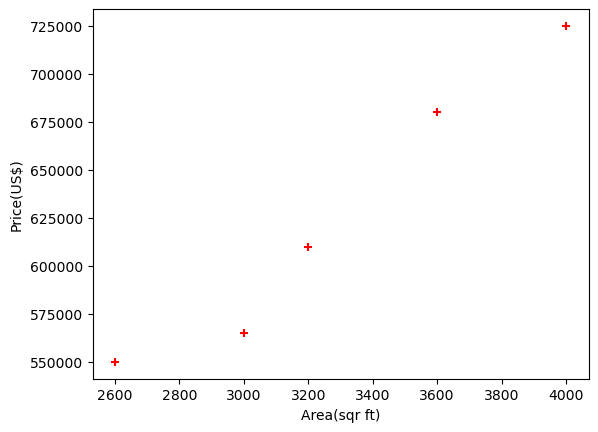

In [5]:
plt.xlabel('Area(sqr ft)')
plt.ylabel('Price(US$)')
plt.scatter(df.Area, df.Price, color = 'red', marker='+')

In [6]:
reg = LinearRegression()
reg.fit(df[['Area']], df.Price)

LinearRegression()

In [7]:
reg.predict([[3300]])

C:\Users\tuana\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
reg.intercept_ #Hệ số chặn (b)

np.float64(180616.43835616432)

In [9]:
reg.coef_ #Hệ số góc 

array([135.78767123])

In [10]:
135.788 * 3300 + 180616.438 #Tính toán theo công thức hồi quy tuyến tính

628716.838

In [14]:
# Tính toán RMSE để đánh giá chất lượng mô hình
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(df[['Area']])
rmse = sqrt(mean_squared_error(df.Price, y_pred))
print(f"\nĐánh giá chất lượng mô hình:")
print(f"RMSE: ${rmse:,.2f}")


Đánh giá chất lượng mô hình:
RMSE: $13,668.03


In [15]:
# Tính toán R-squared để đánh giá mức độ phù hợp của mô hình
r2 = reg.score(df[['Area']], df.Price)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9584


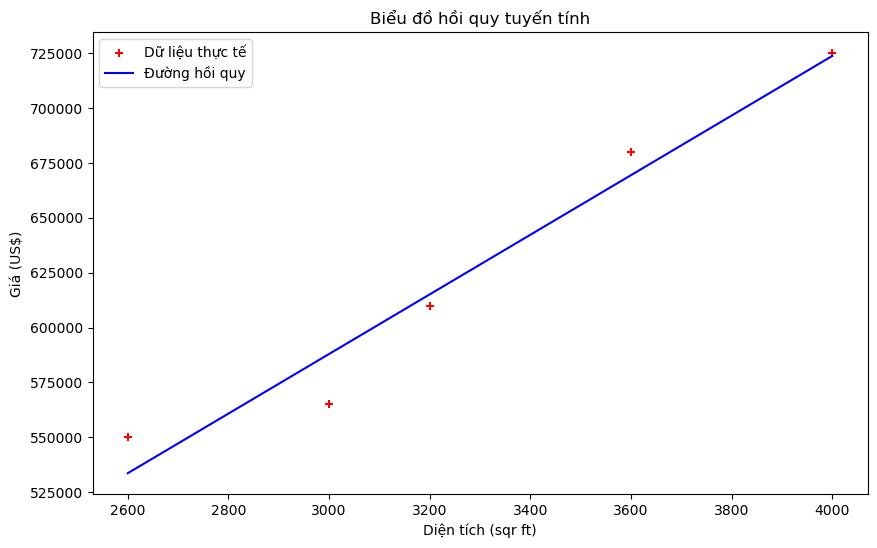

In [16]:
# Vẽ đường hồi quy
plt.figure(figsize=(10, 6))
plt.scatter(df.Area, df.Price, color='red', marker='+', label='Dữ liệu thực tế')
plt.plot(df.Area, y_pred, color='blue', label='Đường hồi quy')
plt.xlabel('Diện tích (sqr ft)')
plt.ylabel('Giá (US$)')
plt.title('Biểu đồ hồi quy tuyến tính')
plt.legend()
plt.show()